In [1]:
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np
import json
import matplotlib.pyplot as plt
import requests 
import networkx as nx
from pulp import *
import seaborn as sn

In [2]:
df = pd.read_csv("Cluster.csv")
df.head()

,Unnamed: 0,Nodes,Latitude,Longitude
0,0,49735507,38.936283,-77.072975
1,1,49748328,38.937335,-77.066387
2,2,49748340,38.938151,-77.066389
3,3,49748353,38.938586,-77.066455
4,4,49753268,38.937332,-77.068636


In [3]:
dataPart1 = df.head(10)

In [4]:
dataPart1

,Unnamed: 0,Nodes,Latitude,Longitude
0,0,49735507,38.936283,-77.072975
1,1,49748328,38.937335,-77.066387
2,2,49748340,38.938151,-77.066389
3,3,49748353,38.938586,-77.066455
4,4,49753268,38.937332,-77.068636
5,5,49753270,38.937332,-77.070886
6,6,49753272,38.937331,-77.072112
7,7,49753274,38.937330,-77.072418
8,8,49753280,38.937287,-77.073793
9,9,49756456,38.938602,-77.065426


In [5]:
df = dataPart1

In [6]:
selected_columns = df[["Latitude","Longitude"]]

df0 = selected_columns.copy()
df0

,Latitude,Longitude
0,38.936283,-77.072975
1,38.937335,-77.066387
2,38.938151,-77.066389
3,38.938586,-77.066455
4,38.937332,-77.068636
5,38.937332,-77.070886
6,38.937331,-77.072112
7,38.937330,-77.072418
8,38.937287,-77.073793
9,38.938602,-77.065426


In [7]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 
subset = df0[['Latitude', 'Longitude']]
tuples = [tuple(x) for x in subset.to_numpy()]
# print(tuples)
coordinates_array = np.array(tuples)
dist_array = pdist(coordinates_array)

dist_matrix = squareform(dist_array)

type(dist_matrix)

numpy.ndarray

In [14]:
distances = pd.DataFrame(dist_matrix, columns = ['0','1','2','3','4','5','6','7','8','9'])

In [15]:
distances.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.006671,0.006846,0.006915,0.004464,0.002338,0.001358,0.001186,0.001295,0.007897
1,0.006671,0.000000,0.000816,0.001253,0.002249,0.004499,0.005725,0.006031,0.007406,0.001590
2,0.006846,0.000816,0.000000,0.000440,0.002392,0.004571,0.005781,0.006085,0.007454,0.001063
3,0.006915,0.001253,0.000440,0.000000,0.002516,0.004605,0.005795,0.006094,0.007452,0.001029
4,0.004464,0.002249,0.002392,0.002516,0.000000,0.002250,0.003476,0.003782,0.005157,0.003452


In [16]:
df0['Coords'] = list(zip(df0['Latitude'],df0['Longitude']))
df0['ID'] = df0.index

df0

,Latitude,Longitude,Coords,ID
0,38.936283,-77.072975,"(38.936283, -77.072975)",0
1,38.937335,-77.066387,"(38.937335, -77.066387)",1
2,38.938151,-77.066389,"(38.938151, -77.066389)",2
3,38.938586,-77.066455,"(38.938586, -77.066455)",3
4,38.937332,-77.068636,"(38.937332, -77.068636)",4
5,38.937332,-77.070886,"(38.937332, -77.070886)",5
6,38.937331,-77.072112,"(38.937331, -77.072112)",6
7,38.937330,-77.072418,"(38.93733, -77.072418)",7
8,38.937287,-77.073793,"(38.937287, -77.073793)",8
9,38.938602,-77.065426,"(38.938602, -77.065426)",9


In [17]:
location = dict( ( ID, (df0.loc[ID, 'Latitude'], df0.loc[ID, 'Longitude']) ) for ID in df0.index)
location

{0: (38.936283, -77.072975),
 1: (38.937335, -77.066387),
 2: (38.938151, -77.066389),
 3: (38.938586, -77.066455),
 4: (38.937332, -77.068636),
 5: (38.937332, -77.070886),
 6: (38.937331, -77.072112),
 7: (38.93733, -77.072418),
 8: (38.937287, -77.073793),
 9: (38.938602, -77.065426)}

(38.93616705, 38.938717950000004, -77.07421135, -77.06500765)

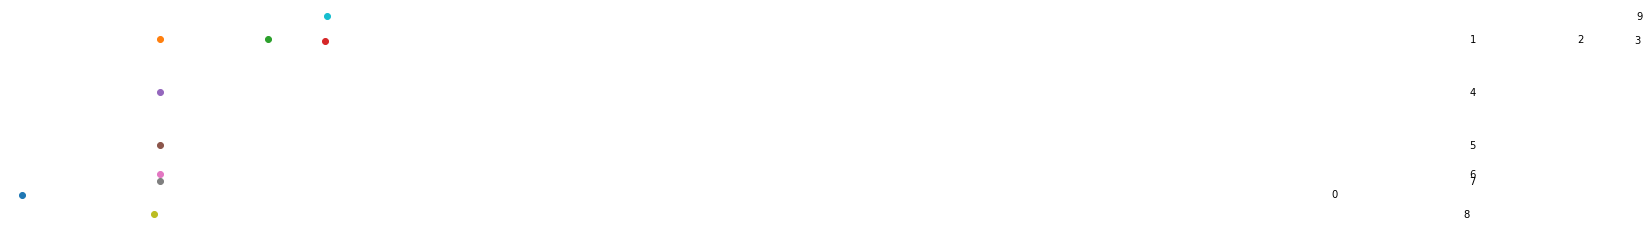

In [18]:
import matplotlib.pyplot as plt
for i in location:
    lo = location[i]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],i,horizontalalignment='center',
             verticalalignment='center')
    
plt.gca().axis('off')

In [19]:
nodeDist = dict( ((i,j), distances.iloc[i, j] ) for i in location for j in location if i != j)

nodeDist

{(0, 1): 0.006671465206377353,
 (0, 2): 0.006845788486358764,
 (0, 3): 0.006914781919910496,
 (0, 4): 0.004464002912185796,
 (0, 5): 0.002337588928785526,
 (0, 6): 0.0013575982469001414,
 (0, 7): 0.0011859418198209507,
 (0, 8): 0.0012950444007761496,
 (0, 9): 0.00789716164200531,
 (1, 0): 0.006671465206377353,
 (1, 2): 0.0008160024509770708,
 (1, 3): 0.0012528467583900512,
 (1, 4): 0.0022490020008803452,
 (1, 5): 0.00449900100021775,
 (1, 6): 0.005725001397377944,
 (1, 7): 0.006031002072617426,
 (1, 8): 0.007406155547909851,
 (1, 9): 0.00159022325477325,
 (2, 0): 0.006845788486358764,
 (2, 1): 0.0008160024509770708,
 (2, 3): 0.000439978408564769,
 (2, 4): 0.002391604064218483,
 (2, 5): 0.004570970356500422,
 (2, 6): 0.005781446964215182,
 (2, 7): 0.006084643128398592,
 (2, 8): 0.007454241208862958,
 (2, 9): 0.001063376697131507,
 (3, 0): 0.006914781919910496,
 (3, 1): 0.0012528467583900512,
 (3, 2): 0.000439978408564769,
 (3, 4): 0.0025158054376237813,
 (3, 5): 0.004605027361479907,
 (

In [20]:
vehicles = 3

In [21]:
prob=LpProblem("vehicle", LpMinimize)

In [22]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',nodeDist, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df0.ID, 0, len(df0.ID)-1, LpInteger)

In [23]:
cost = lpSum([indicator[(i,j)]*nodeDist[(i,j)] for (i,j) in nodeDist])
prob+=cost

In [24]:
for v in df0.ID:
    cap = 1 if v != 8 else vehicles
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df0.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df0.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df0.ID)/vehicles
for i in df0.ID:
    for j in df0.ID:
        if i != j and (i != 8 and j!= 8) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [25]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 3.81 s
Optimal


In [26]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [27]:
routes = get_next_loc(8)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=8:
        r.append(get_next_loc(r[-1][1])[-1])

In [28]:
routes


[[(8, 0), (0, 6), (6, 7), (7, 8)],
 [(8, 1), (1, 4), (4, 5), (5, 8)],
 [(8, 3), (3, 9), (9, 2), (2, 8)]]

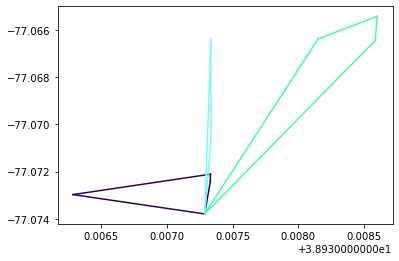

In [30]:
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = location[a], location[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

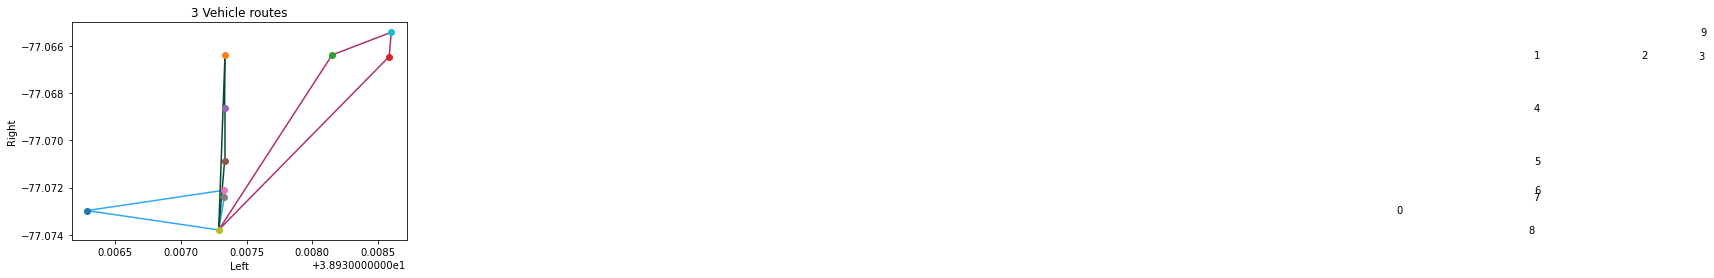

In [32]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = location[a], location[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in location:
    lo = location[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%vehicles + 'Vehicle routes' if vehicles > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()